# Final Project (Visuals/Models)

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [248]:
df = pd.read_csv("Preprocessed_Salary_Data.csv")
data = pd.read_csv("Visual_Salary_Data.csv")

# Distribution of Ages

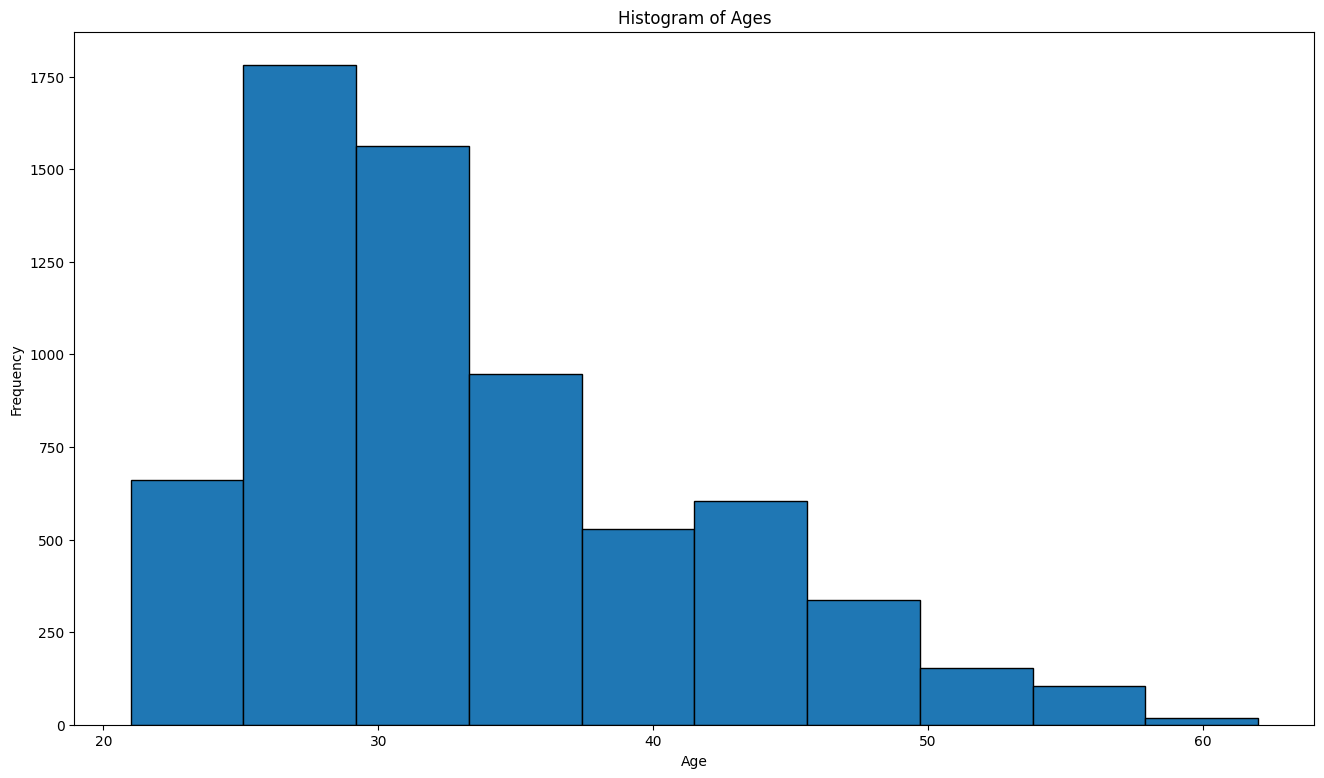

In [249]:
plt.figure(figsize=(16,9))
plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Genders

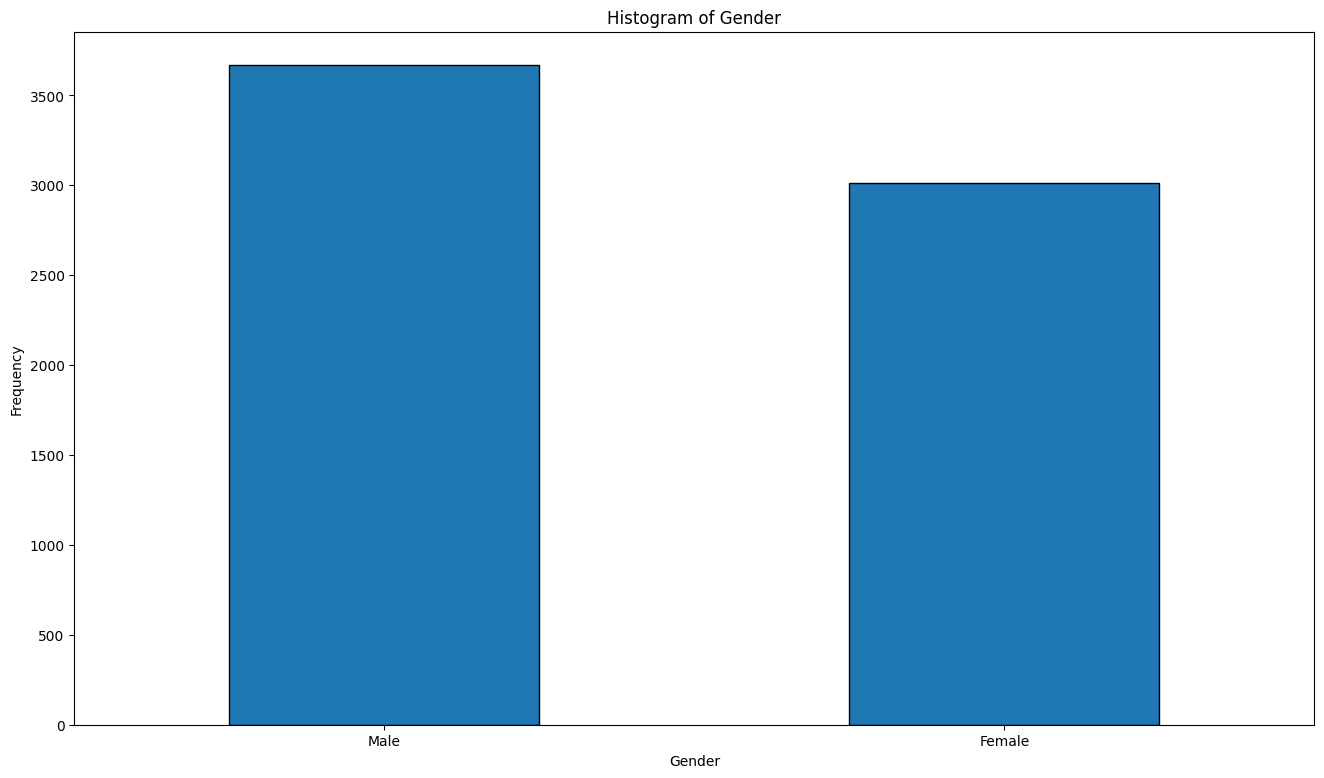

In [250]:
filtered_data = data[data['Gender'].isin(['Male', 'Female'])]
plt.figure(figsize=(16,9))
filtered_data['Gender'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Distribution of Education Level

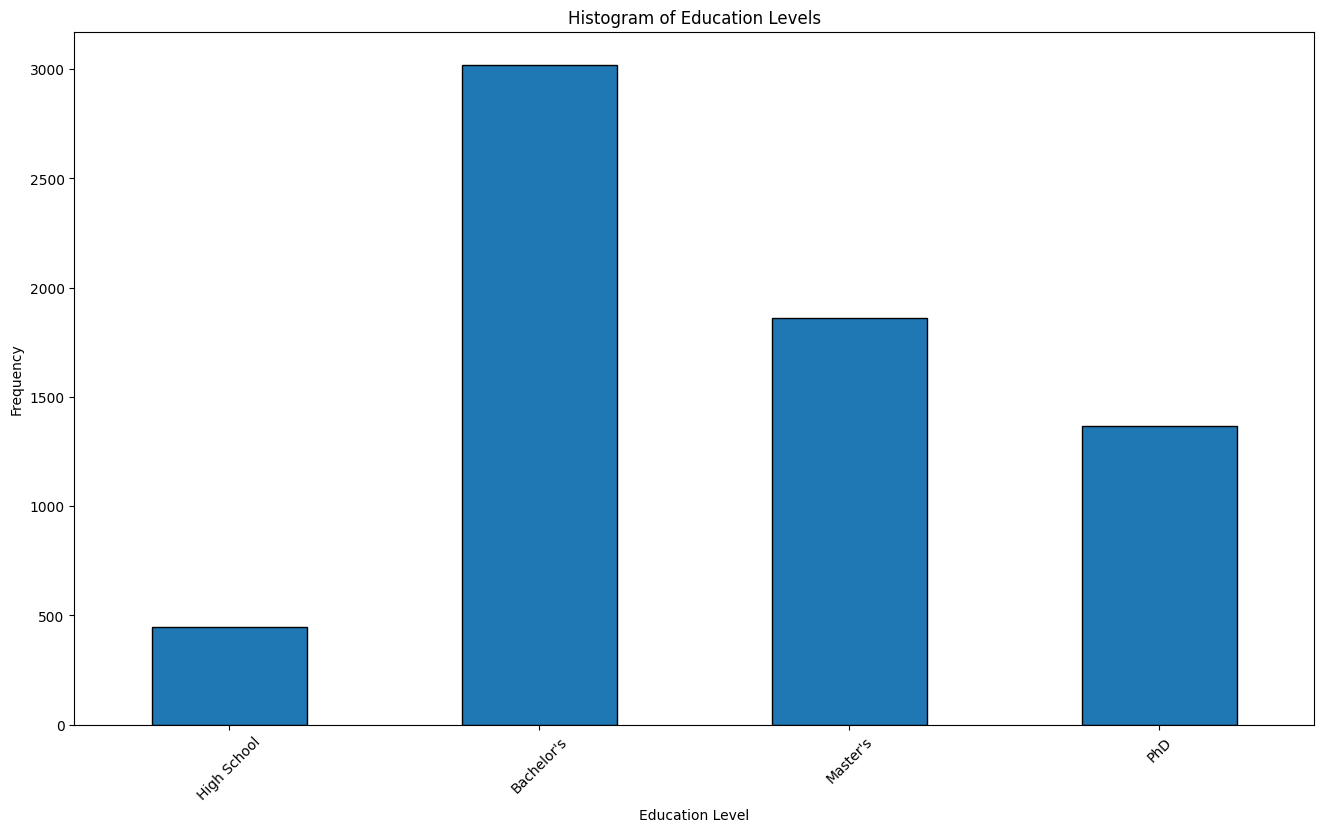

In [251]:
education_order = ['High School', "Bachelor's", "Master's", 'PhD']
education_counts = data['Education Level'].value_counts()
education_counts = education_counts.reindex(education_order)
plt.figure(figsize=(16,9))
education_counts.plot(kind='bar', edgecolor='black')
plt.title('Histogram of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Distribution of Years of Experience

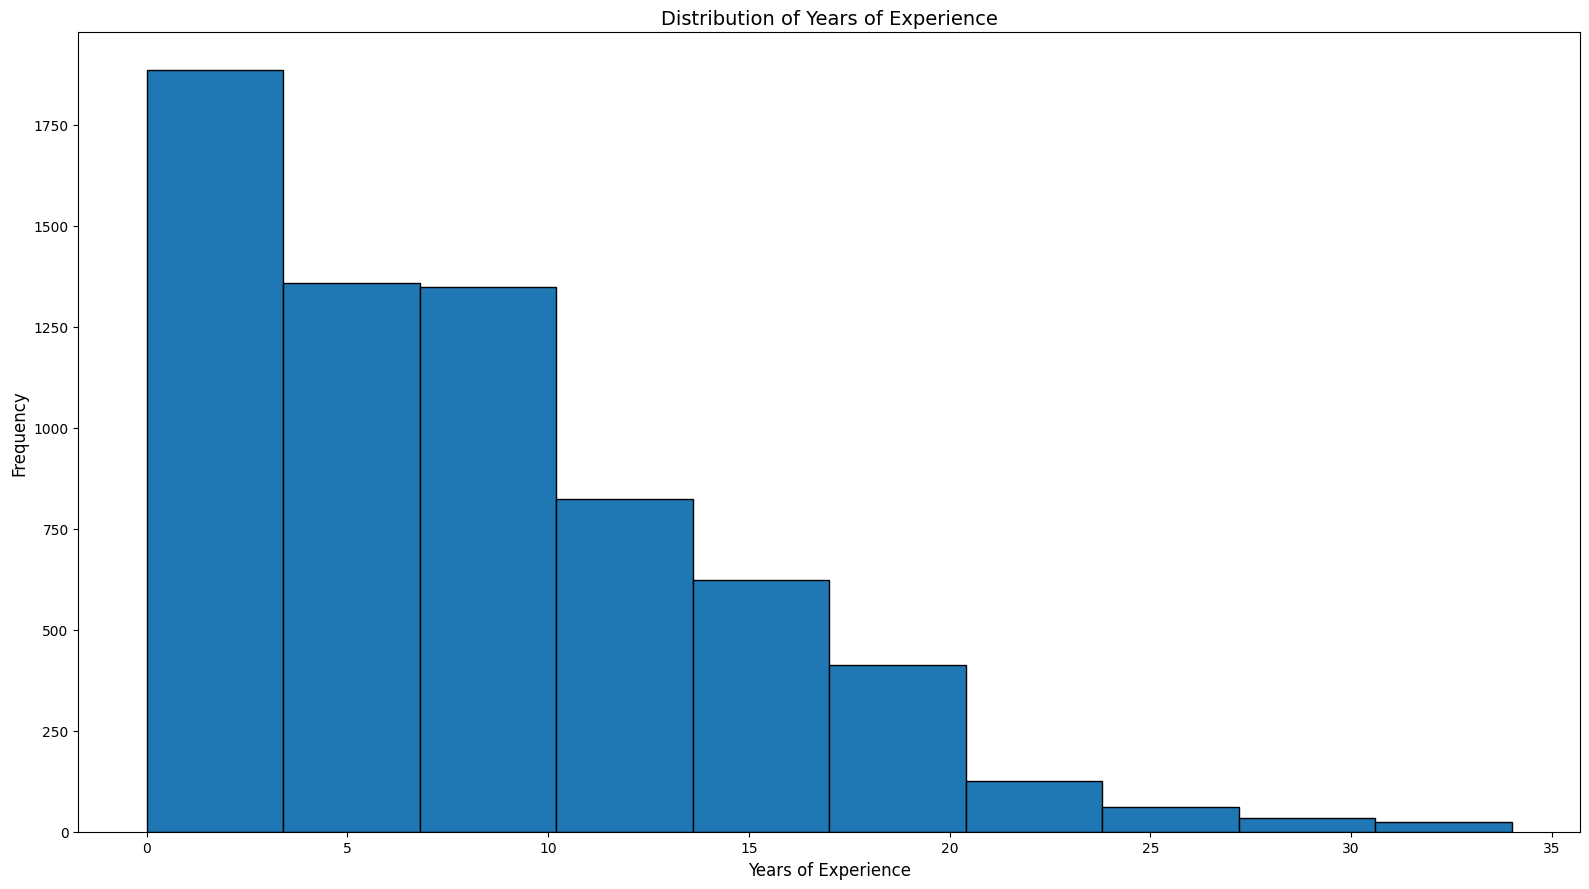

In [252]:
plt.figure(figsize=(16,9))
plt.hist(data['Years of Experience'], bins=10, edgecolor='black')
plt.title('Distribution of Years of Experience', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Distribution of Salaries

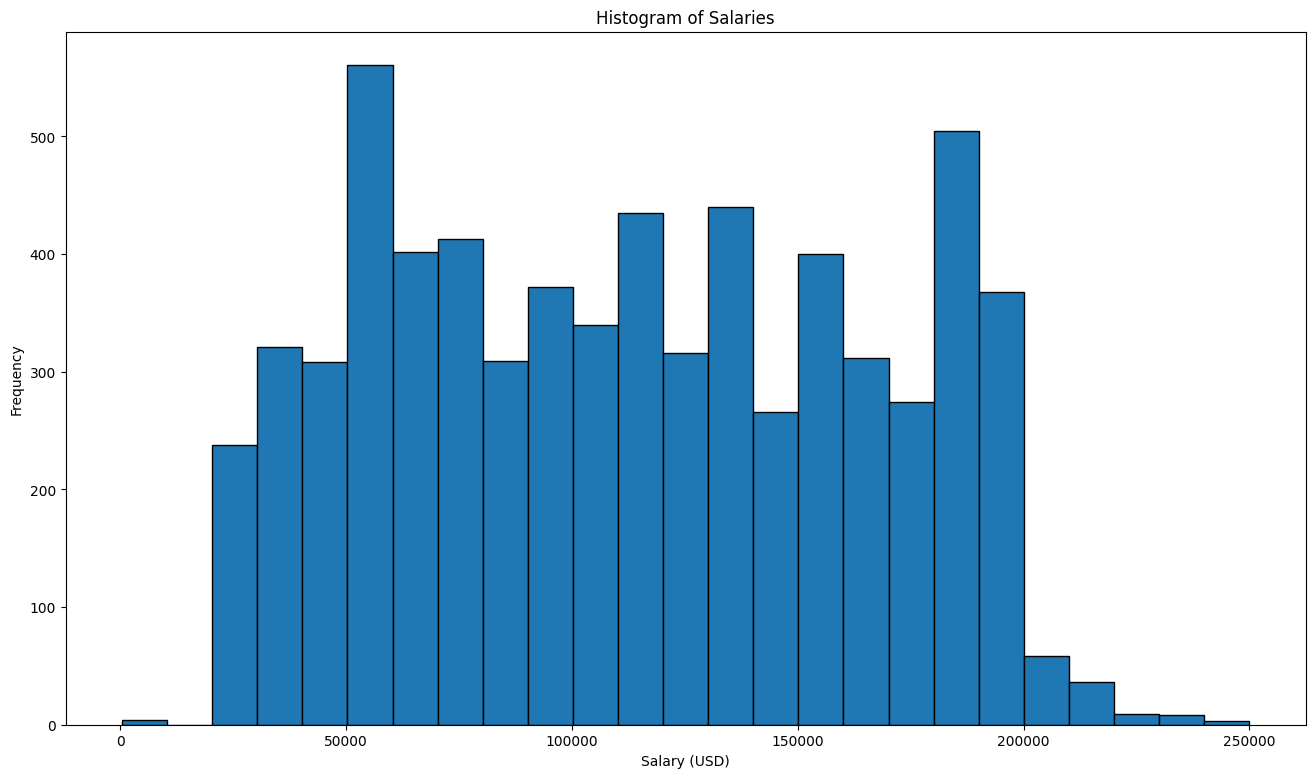

In [253]:
plt.figure(figsize=(16,9))
plt.hist(data['Salary'], bins=25, edgecolor='black')
plt.title('Histogram of Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot Showing Relationship Between Years of Experience and Salary

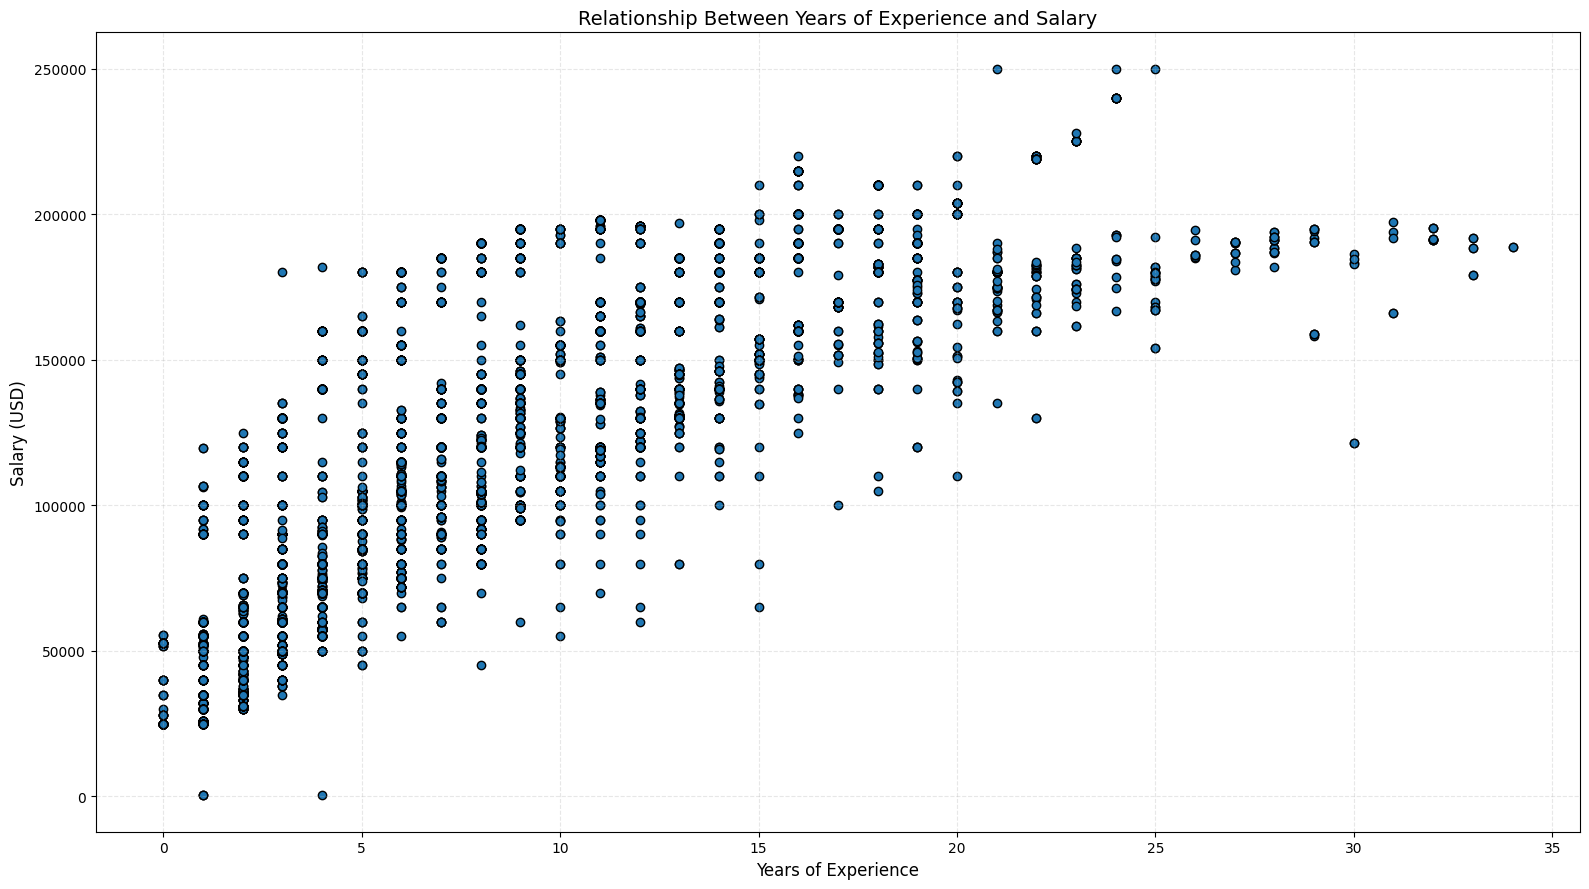

In [254]:
plt.figure(figsize=(16,9))
plt.scatter(data['Years of Experience'], data['Salary'], edgecolor='black')
plt.title('Relationship Between Years of Experience and Salary', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Scatter Plot Showing Relationship Between Age and Salary

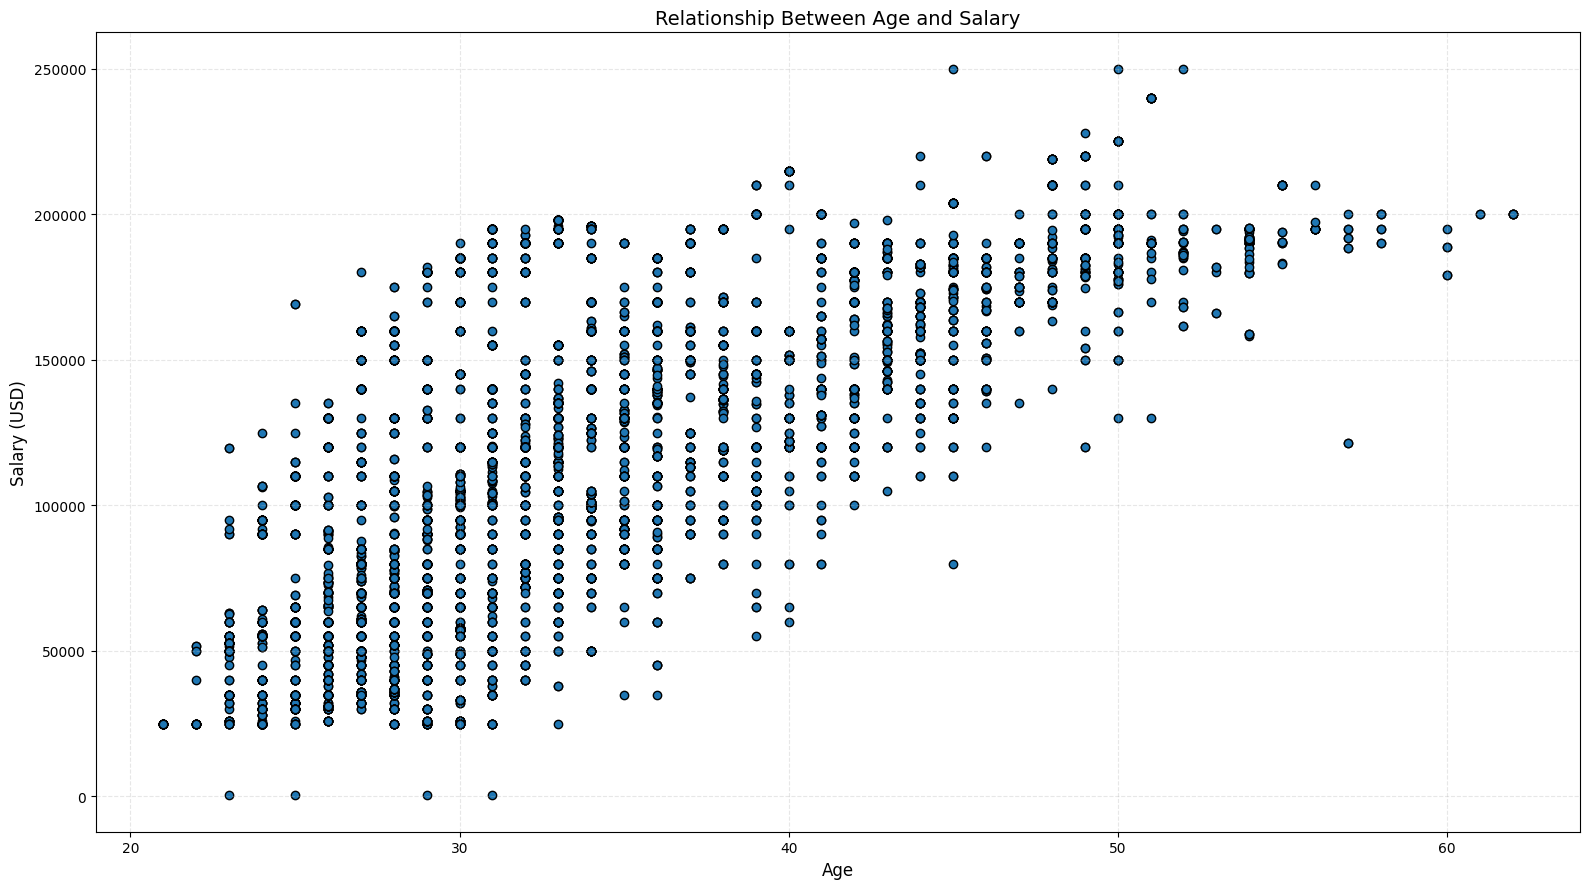

In [255]:
plt.figure(figsize=(16,9))
plt.scatter(data['Age'], data['Salary'], edgecolor='black')
plt.title('Relationship Between Age and Salary', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Bar Graph Showing Average Salary by Education Level

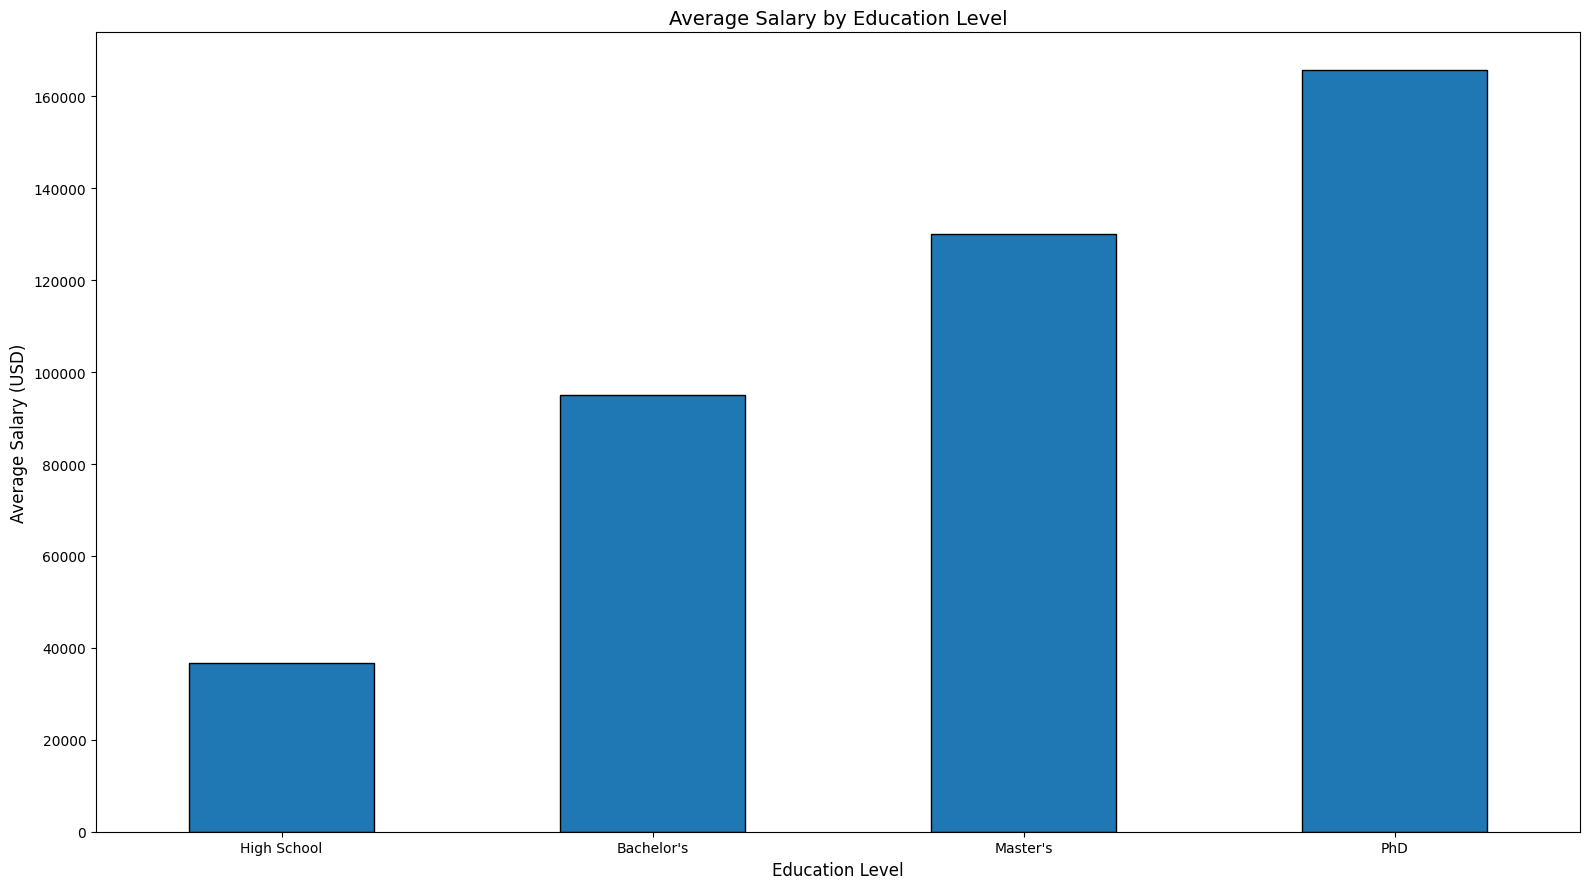

In [256]:
education_order = ['High School', "Bachelor's", "Master's", 'PhD']
avg_salary_by_education = (data.groupby('Education Level')['Salary'].mean().reindex(education_order))
plt.figure(figsize=(16,9))
avg_salary_by_education.plot(kind='bar', edgecolor='black')
plt.title('Average Salary by Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Scatter Plot Shwoing Salary Distribution by Gender

<Figure size 1600x900 with 0 Axes>

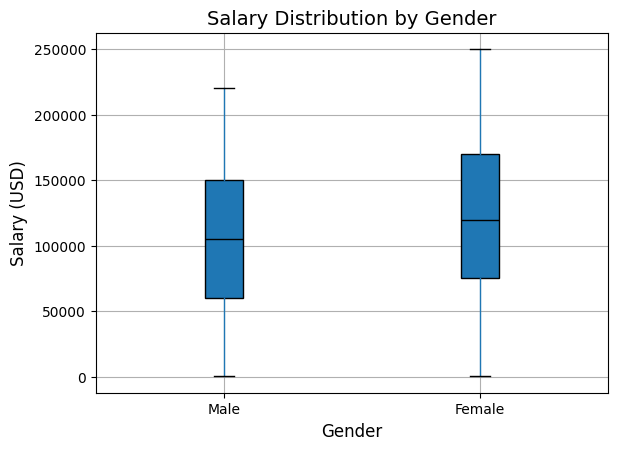

In [257]:
plt.figure(figsize=(16,9))
filtered_data.boxplot(column='Salary', by='Gender', patch_artist=True,boxprops=dict(color='black'),medianprops=dict(color='black'))
plt.title('Salary Distribution by Gender', fontsize=14)
plt.suptitle('')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks([1, 2], ['Male', 'Female'], fontsize=10)
plt.show()

# Grouped Bar Graph Showing Salary by Gender and Education Level

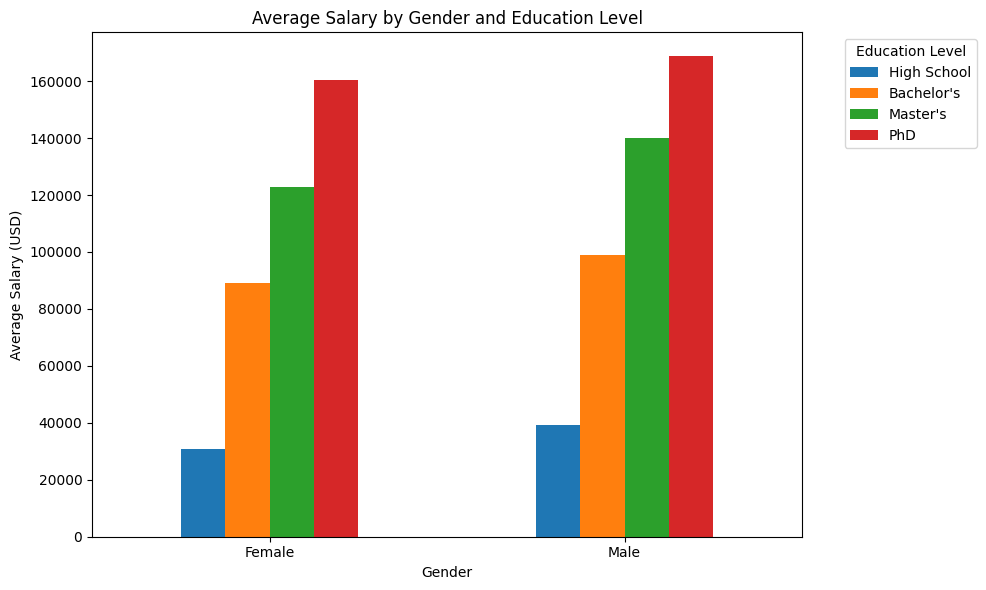

In [258]:
education_order = ['High School', "Bachelor's", "Master's", 'PhD']
grouped_data = filtered_data.groupby(['Gender', 'Education Level'])['Salary'].mean().unstack()
available_columns = grouped_data.columns.intersection(education_order)
ordered_columns = [col for col in education_order if col in available_columns]
grouped_data = grouped_data[ordered_columns]
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Salary by Gender and Education Level')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Stacked Bar Graph Showing Distribution of Education Levels Within Each Gender

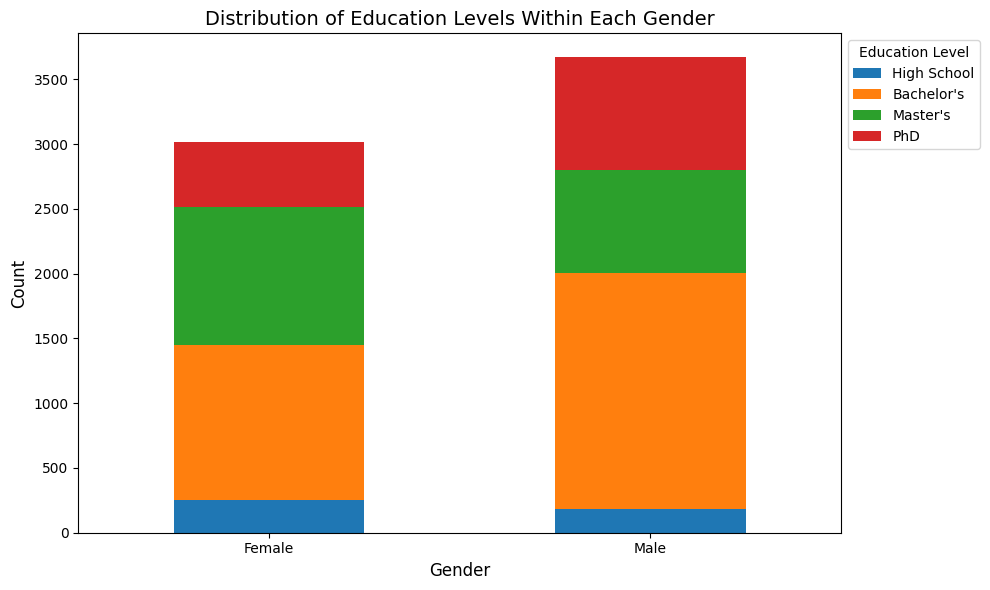

In [259]:
ordered_levels = ["High School", "Bachelor's", "Master's", "PhD"]
education_gender_encoded = filtered_data.groupby(['Gender', 'Education Level']).size().unstack(fill_value=0)
education_gender_ordered = education_gender_encoded.reindex(columns=ordered_levels)
education_gender_ordered.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Education Levels Within Each Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(len(education_gender_ordered.index)), labels=education_gender_ordered.index, rotation=0)
plt.legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Pie Chart Showing Distribution of Degrees Held by Males

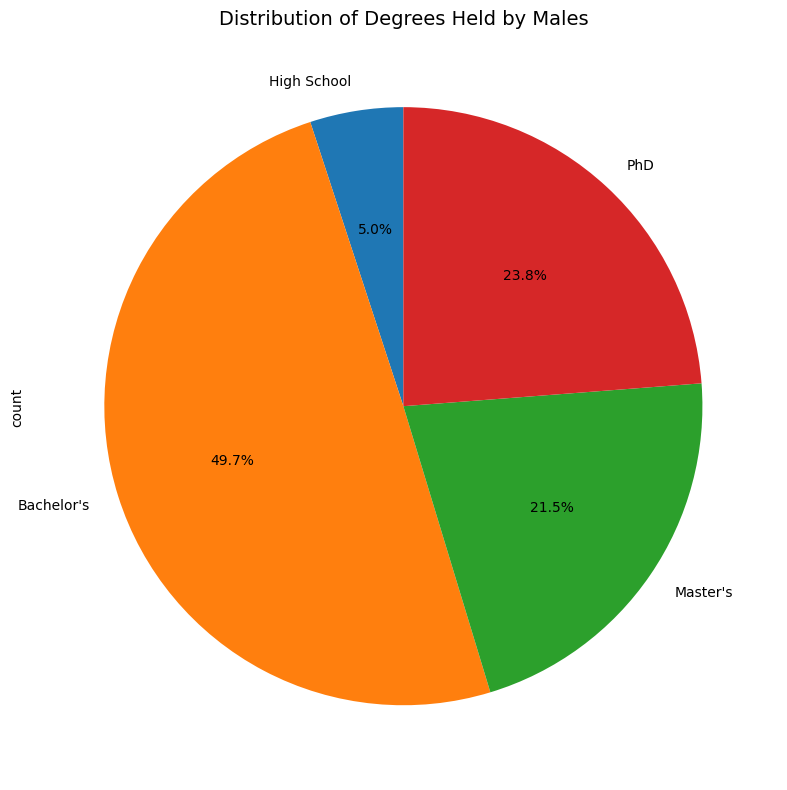

In [260]:
male_data = filtered_data[filtered_data['Gender'] == 'Male']
male_degrees = male_data['Education Level'].value_counts()
order = ["High School", "Bachelor's", "Master's", "PhD"]
male_degrees = male_degrees.reindex(order, fill_value=0)
plt.figure(figsize=(8, 9))
male_degrees.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    labels=male_degrees.index
)
plt.title("Distribution of Degrees Held by Males", fontsize=14)
plt.tight_layout()
plt.show()

# Pie Chart Showing Distribution of Degrees Held by Females

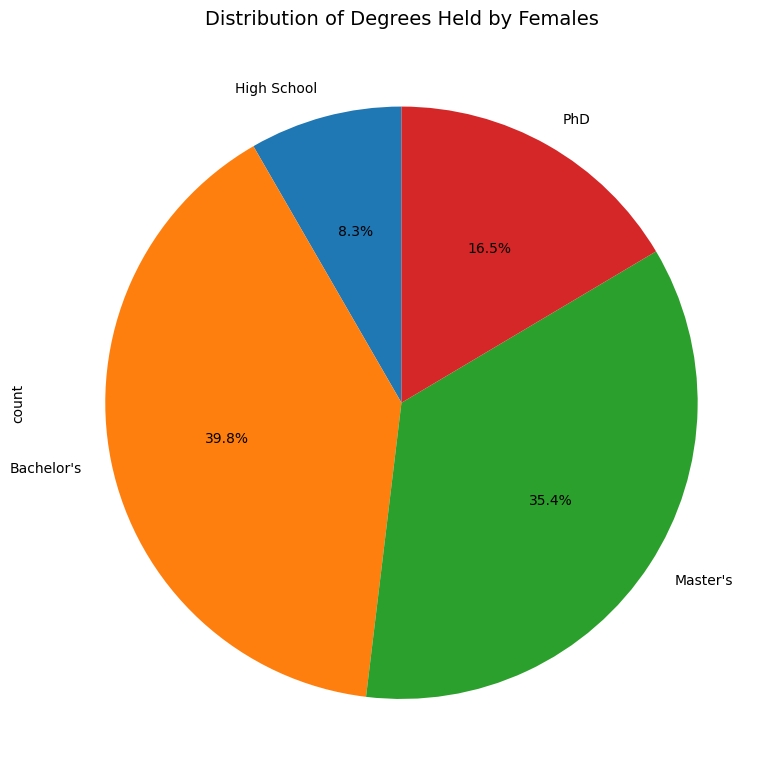

In [261]:
female_data = filtered_data[filtered_data['Gender'] == 'Female']
female_degrees = female_data['Education Level'].value_counts()
order = ["High School", "Bachelor's", "Master's", "PhD"]
female_degrees = female_degrees.reindex(order, fill_value=0)
plt.figure(figsize=(8, 9))
female_degrees.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    labels=female_degrees.index
)
plt.title("Distribution of Degrees Held by Females", fontsize=14)
plt.tight_layout()
plt.show()

# Correlation Heatmap

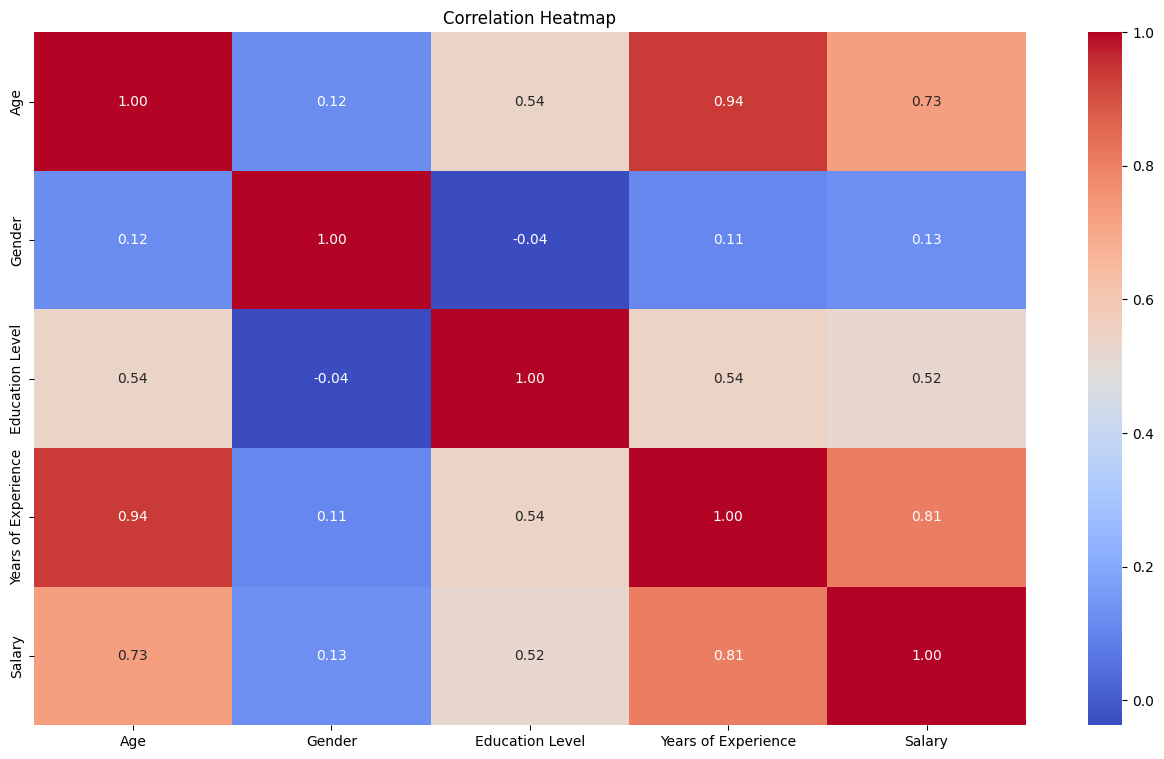

In [262]:
plt.figure(figsize=(16, 9))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Functions for Machine Learning

**Train Test Split**

In [263]:
def train_test_split_data(df, features, target):
    X = df[features]
    y = df[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

**Polynomial Features (Ridge Regression)**

In [264]:
def add_polynomial_features(X_train, X_test, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    return X_train_poly, X_test_poly

**Ridge Model Shell**

In [265]:
def train_ridge_regression(X_train, y_train, alpha=1):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    return model

**Random Forest Shell**

In [266]:
def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    return model

**Model Evaluation**

In [267]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

**Model Performance Visualization**

In [268]:
def visualize_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(16,9))
    plt.scatter(y_test, y_pred, alpha=0.2)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title("Predicted vs Actual Salaries")
    plt.xlabel("Actual Salary (Standard Deviations From Mean)")
    plt.ylabel("Predicted Salary (Standard Deviations From Mean)")
    plt.grid(True)
    plt.show()

    residuals = y_test - y_pred
    plt.figure(figsize=(16,9))
    plt.scatter(y_pred, residuals, alpha=0.2)
    plt.axhline(y=0, color='red', linewidth=2)
    plt.title("Residuals vs Predicted Salaries")
    plt.xlabel("Predicted Salary (Standard Deviations From Mean)")
    plt.ylabel("Residuals (Standard Deviations From Predicted)")
    plt.grid(True)
    plt.show()

# Models Performed and Visualized

**Ridge Model Performed**

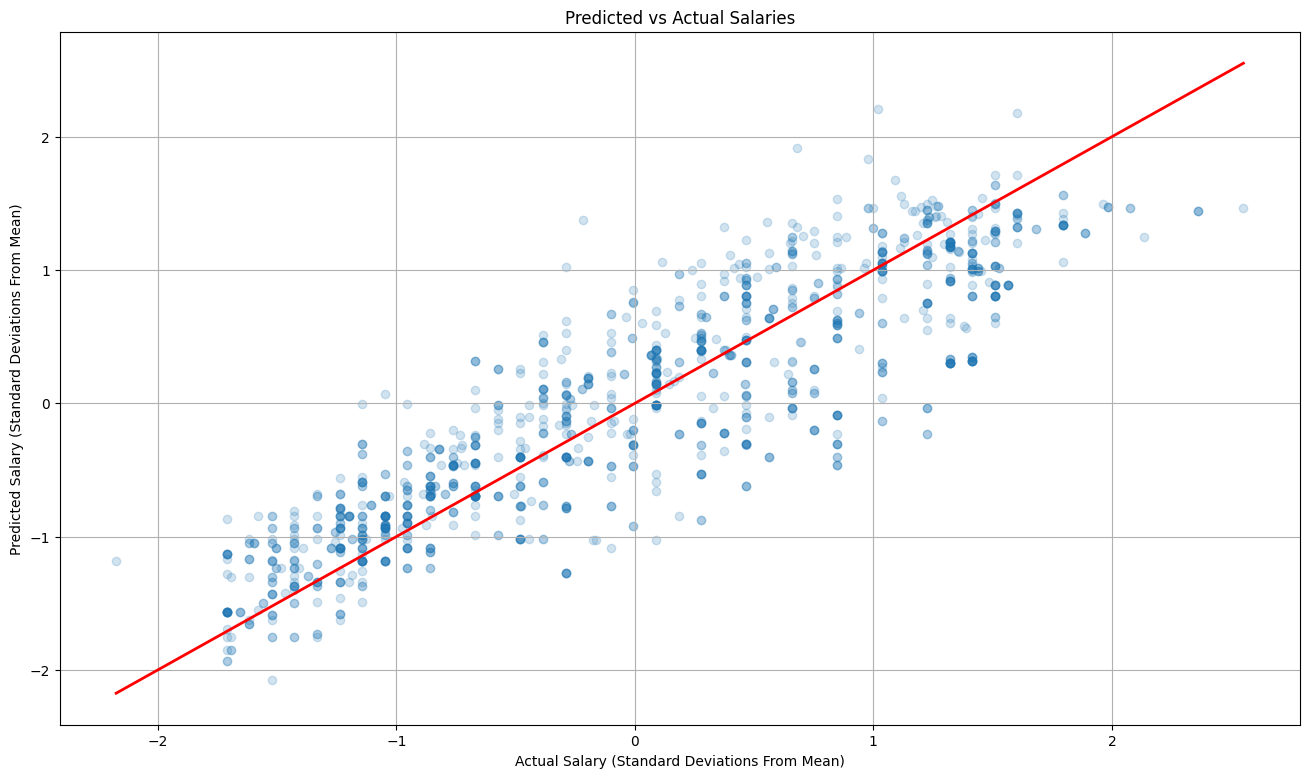

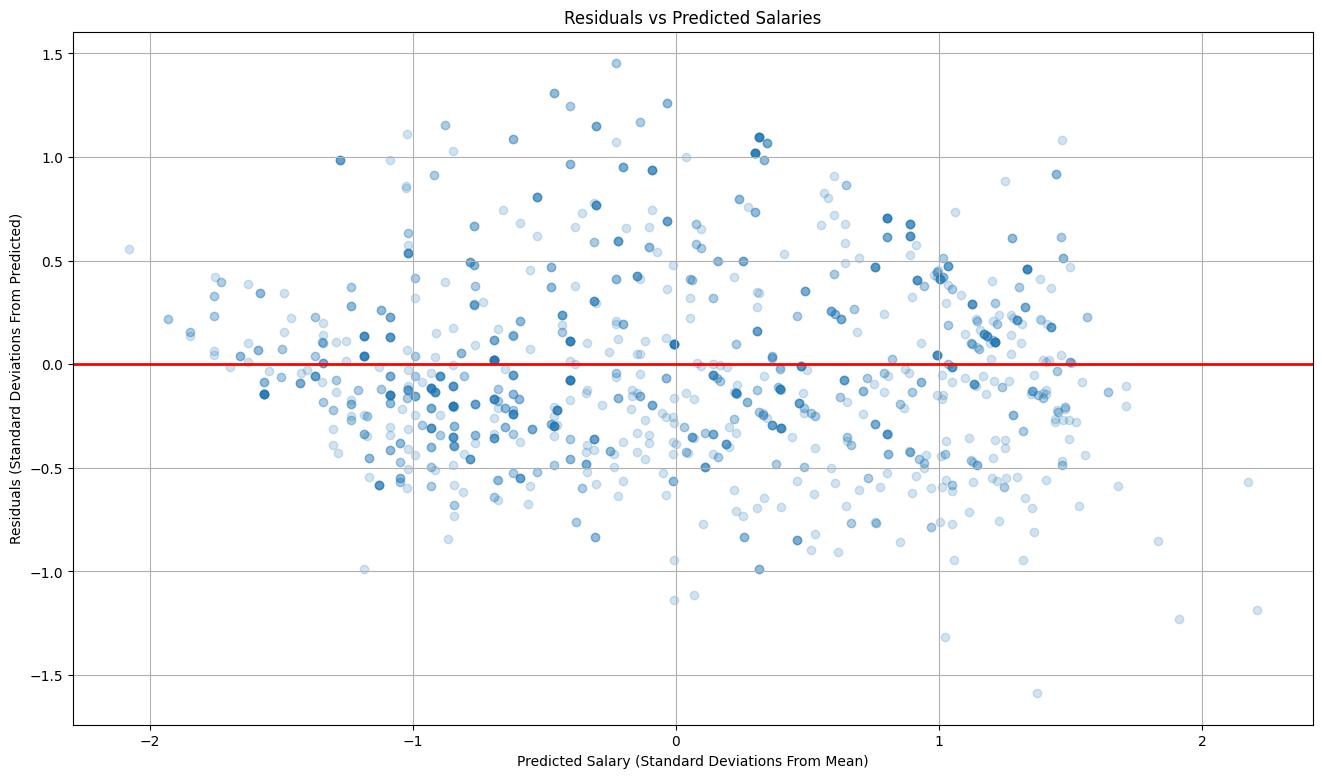

Mean Absolute Error (MAE): 0.35567413963390565
Mean Squared Error (MSE): 0.20758432457804746
R² Score: 0.797155866570255


In [269]:
def main():
    features = ['Education Level', 'Years of Experience', "Age"]
    target = 'Salary'
    
    X_train, X_test, y_train, y_test = train_test_split_data(df, features, target)
    
    X_train_poly, X_test_poly = add_polynomial_features(X_train, X_test, degree=2)
    
    model = train_ridge_regression(X_train_poly, y_train, alpha=1)
    
    mae, mse, r2 = evaluate_model(model, X_test_poly, y_test)
    
    visualize_model(model, X_test_poly, y_test)
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")

if __name__ == "__main__":
    main()

**Random Forest Regressor Model Performed**

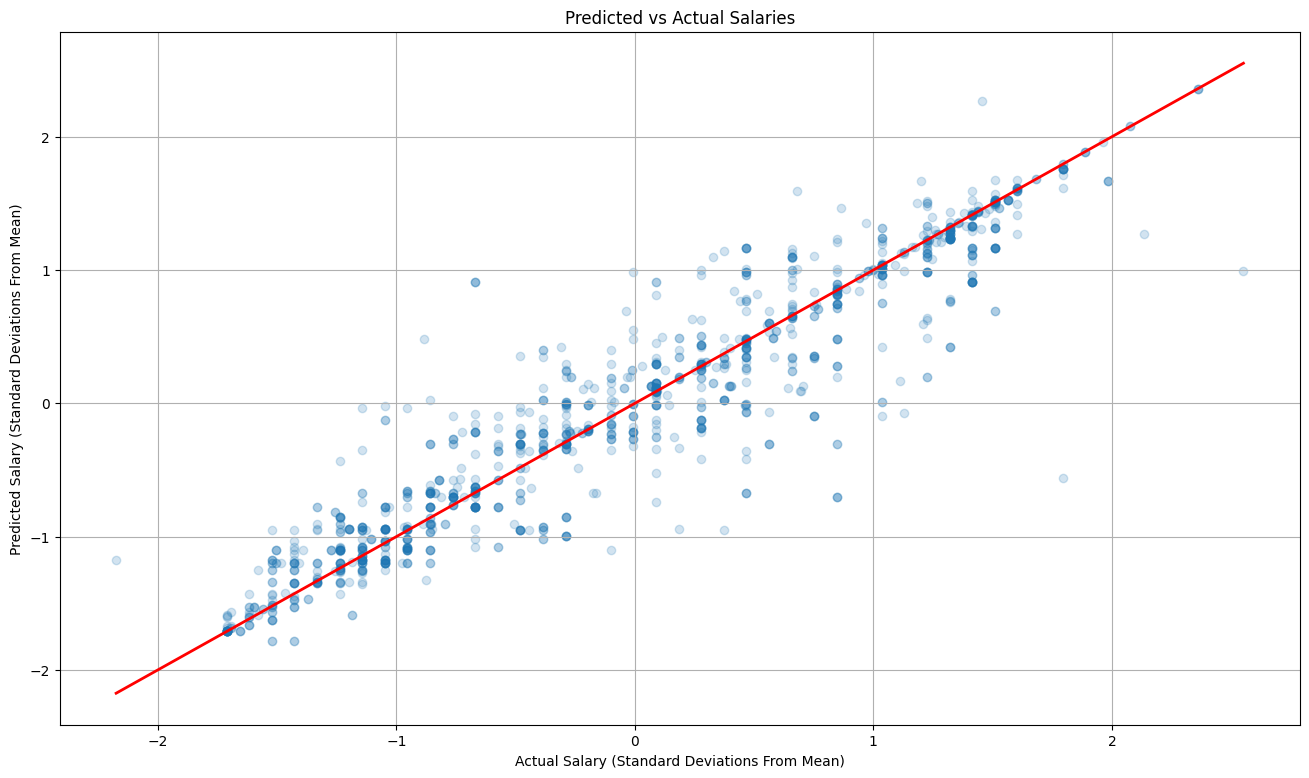

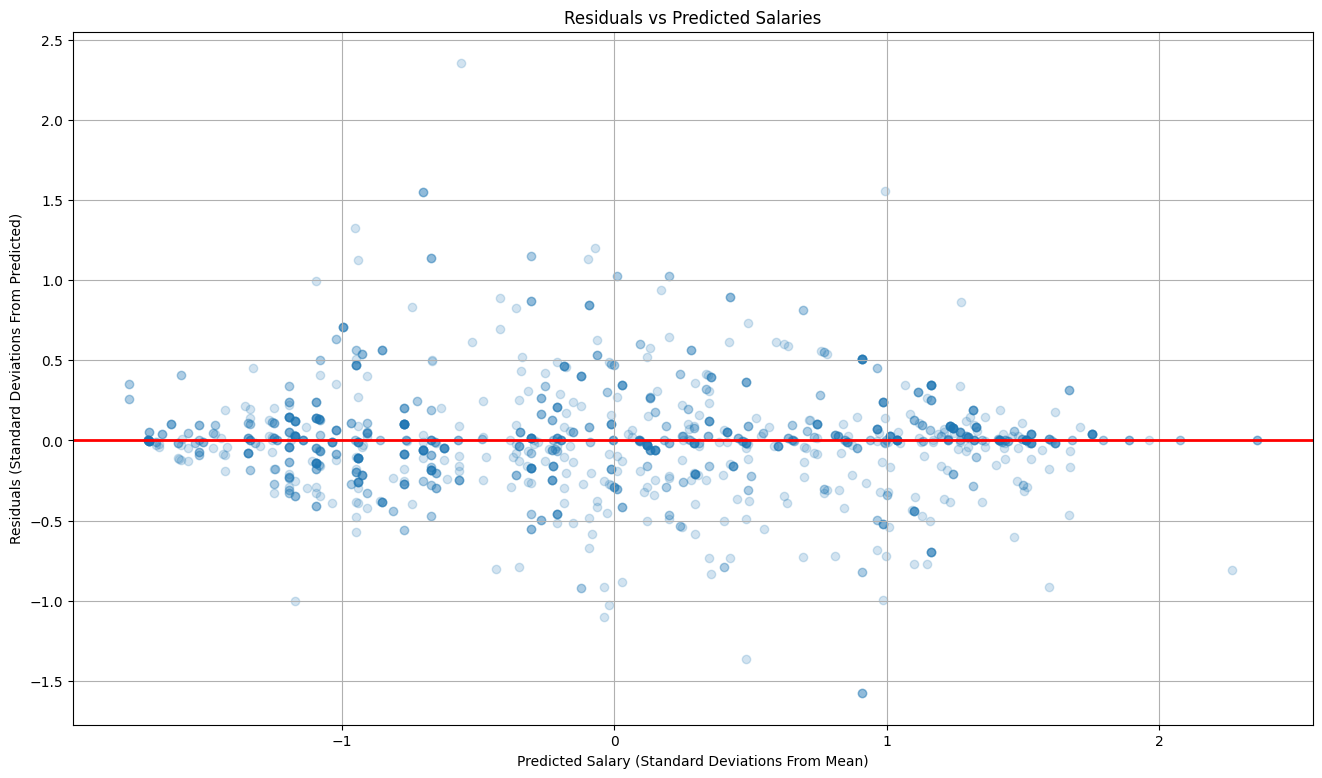

Mean Absolute Error (MAE): 0.2032429930400899
Mean Squared Error (MSE): 0.10644569797550738
R² Score: 0.8959849911256278


In [270]:
def main():
    features = ['Education Level', 'Years of Experience', 'Age']
    target = 'Salary'
    
    X_train, X_test, y_train, y_test = train_test_split_data(df, features, target)
    
    model = train_random_forest(X_train, y_train, n_estimators=200, max_depth=15)
    
    mae, mse, r2 = evaluate_model(model, X_test, y_test)

    visualize_model(model, X_test, y_test)
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")

# Execute the main function
if __name__ == "__main__":
    main()


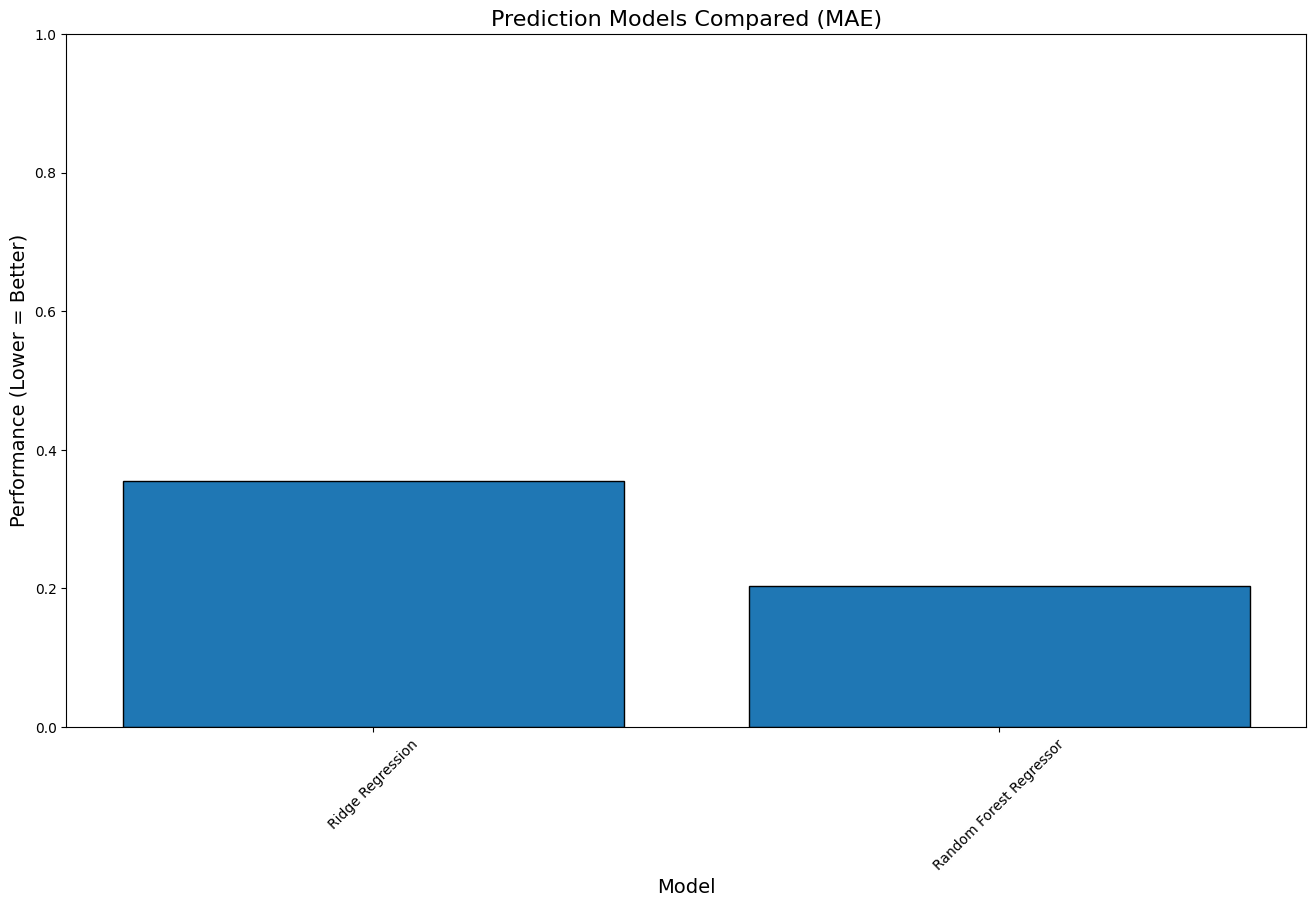

In [274]:
prediction_model_type = ['Ridge Regression', 'Random Forest Regressor']
performance_values = [0.35567413963390565, 0.2032429930400899]

plt.figure(figsize=(16, 9))
plt.bar(prediction_model_type, performance_values, edgecolor='black')

plt.title("Prediction Models Compared (MAE)", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Performance (Lower = Better)", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1) 

plt.show()

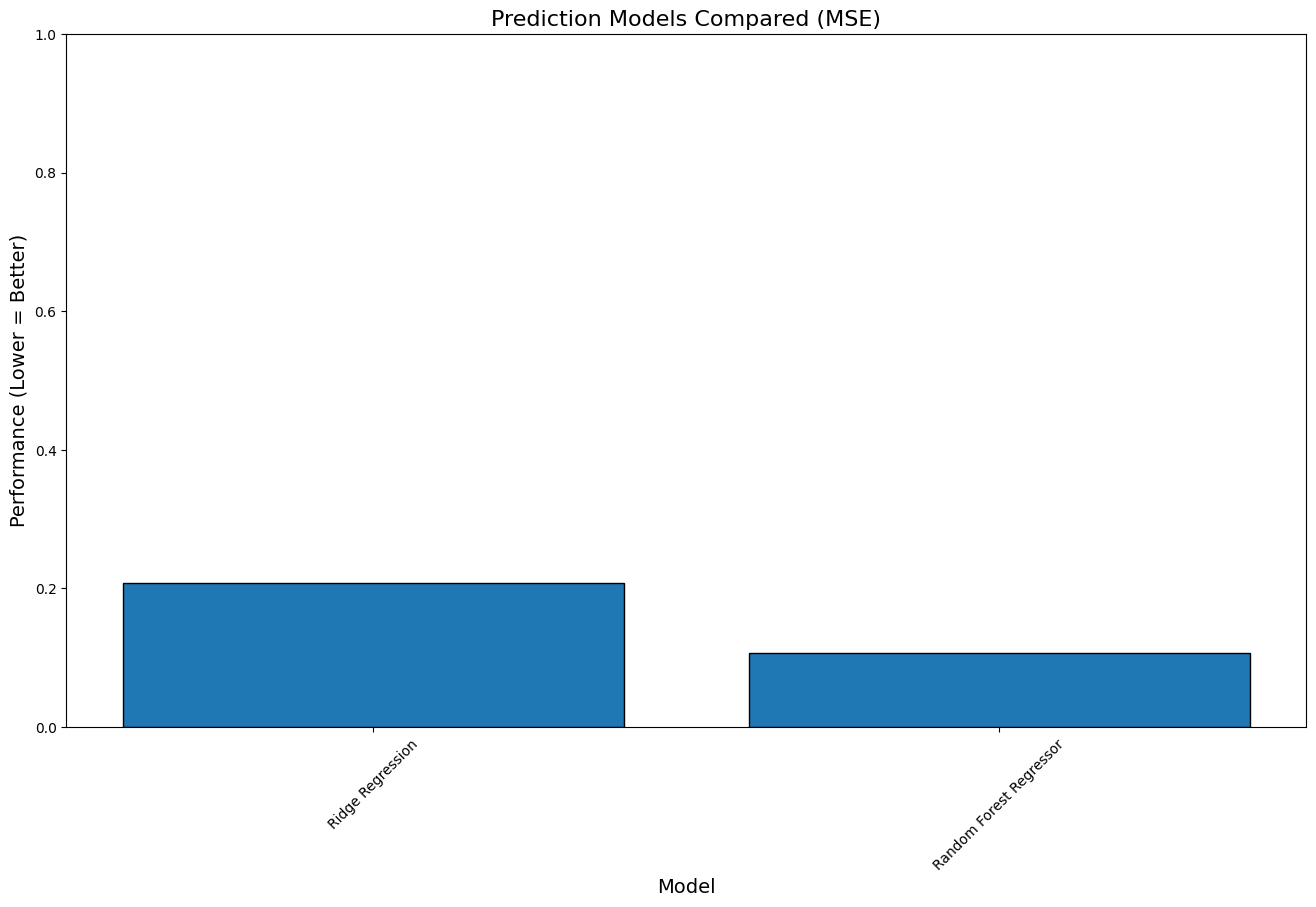

In [275]:
prediction_model_type = ['Ridge Regression', 'Random Forest Regressor']
performance_values = [0.20758432457804746, 0.10644569797550738]

plt.figure(figsize=(16, 9))
plt.bar(prediction_model_type, performance_values, edgecolor='black')

plt.title("Prediction Models Compared (MSE)", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Performance (Lower = Better)", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1) 

plt.show()

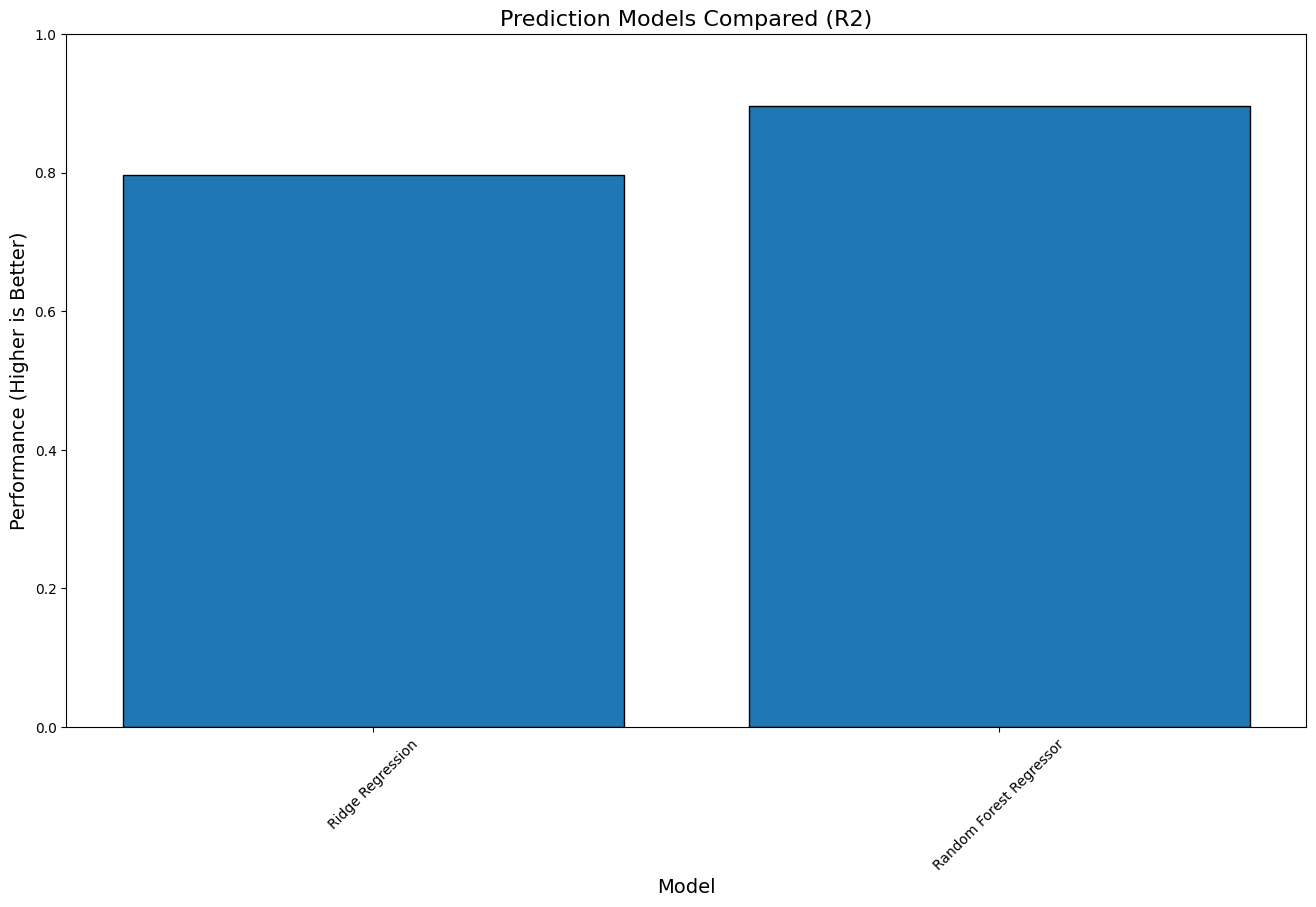

In [276]:
prediction_model_type = ['Ridge Regression', 'Random Forest Regressor']
performance_values = [0.797155866570255, 0.8959849911256278]

plt.figure(figsize=(16, 9))
plt.bar(prediction_model_type, performance_values, edgecolor='black')

plt.title("Prediction Models Compared (R2)", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Performance (Higher is Better)", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1) 

plt.show()